## Practical Number 4_1
#### Ньяти Каелиле БВТ2201

#### Normal distribution

### Exercise 1, 2, 3

In [15]:
import random, math

#k1 = 2
#k2 = 1
#k3 = 7
#k4 = 3

#function to generate random frequencies
def sum_of_random_frequencies_from_random_numbers(k1, k2, k3, k4):

    # Step 1: Generate random numbers
    k1 = random.uniform(0, k1) 
    k2 = random.uniform(0,k2)
    k3 = random.uniform(0,k3)
    k4 = random.uniform(0,k4)

    #store generated random numbers
    random_numbers = [k1, k2, k3, k4]
    
    #find total of generated numbers
    total = k1 + k2 + k3 + k4

    #find the frequencies of generated numbers
    frequencies = [num / total for num in random_numbers]

    #find the sum of the frequencies of generated numbers
    result = sum(frequencies)
    
    return result, frequencies, random_numbers, total

# Example usage
sum_random_frequencies, frequencies, random_numbers, sum_random_numbers = sum_of_random_frequencies_from_random_numbers(k1, k2, k3, k4)
print("Random frequencies:", frequencies)
print("Sum of frequencies:", sum_random_frequencies) 
print("Random numbers:", random_numbers)
print("Sum of random numbers:", sum_random_numbers)  


Random frequencies: [0.5327493669550494, 0.08409675086886532, 0.06245594867457011, 0.32069793350151504]
Sum of frequencies: 1.0
Random numbers: [1.9622670009402527, 0.3097521824557916, 0.23004297085700265, 1.181221435844242]
Sum of random numbers: 3.6832835900972896


In [16]:
import math, random

# Function to calculate mean for normal distribution
def mean_theory(sum_random_frequencies):
    math_exp = 0.5*(sum_random_frequencies)
    return math_exp       

#Function to calculate variance for normal distribution
def variance_theory(frequencies):
    result = 0
    for frequency in frequencies:
        result += (frequency**2)

    variance_value = (1/12)*result
    return variance_value  
    
#Function to calculate standard deviation
def standard_deviation(variance_value):
    if variance_value is None or variance_value == 0:
        return None
    return math.sqrt(variance_value)

#probability distribution function (pdf) for normal distribution
def normal_dis_function(std, expectation, x):
    part_1 = 1/(std*(math.sqrt(2*(math.pi)))) #std is the standard deviation
    part_2 = math.exp((-1/2)*(((x- expectation)/std)**2)) #math_exp is the mathematical expectation
    result = part_1 * part_2
    return result


In [17]:
# Function to calculate mean of a sample
def mean_sample(data):
    return sum(data) / len(data)


# Function to calculate mean of squares of sample
def mean_of_squares_sample(data):
    return sum(x**2 for x in data) / len(data)


# Function to calculate unbiased sample variance
def unbiased_sample_variance(data, mean_sample, mean_of_squares_sample):
    N = len(data)
    if N < 2:
        return None
    return (N / (N - 1)) * (mean_of_squares_sample - mean_sample**2)



def relative_error(mean_sample, mean_theory):
    #(max_x+min_x)/2 - theoretical mathematical expectation
    return ((abs(mean_sample - mean_theory)) / mean_theory) * 100  


def relative_err_var(variance, variance_theory):
    if variance is None or variance == 0:
        return None
    #((max_x-min_x)**2)/12 -  theoretical variance
    return ((abs(variance - variance_theory)) / variance_theory) * 100 

def relative_err_std(std_dev_sample, std_dev_theory):
    if std_dev_sample is None or std_dev_sample == 0:
        return None
    return ((abs(std_dev_sample  - std_dev_theory)) / std_dev_theory) * 100  

In [18]:
def simulations(k1, k2, k3, k4, random_numbers):
    
    # Calculate the theoretical expectation
    mean_theory_value = mean_theory(k1, k2, k3, k4)

    # Calculate the sample expectation
    mean_sample_value = mean_sample(random_numbers)

    #Calculate mean of squares
    mean_of_squares_sample_value = mean_of_squares_sample(random_numbers)


    #Calculate the theoretical variance
    variance_theory_value = variance_theory(k1, k2, k3, k4)

    #Calculate the sample variance
    variance_sample_value = unbiased_sample_variance(random_numbers, mean_sample_value, mean_of_squares_sample_value)

    
    # Calculate the theoretical standard deviation
    std_dev_theory = standard_deviation(variance_theory_value)

    #Calculate the sample standard deviation
    std_dev_sample = standard_deviation(variance_sample_value)


    #Relative error for expectation
    relative_err = relative_error(mean_sample_value, mean_theory_value)

    #Relative error for variance
    relative_err_variance = relative_err_var(variance_sample_value, variance_theory_value)

    #Relative error for standard deviation
    relative_err_standard = relative_err_std(std_dev_sample, std_dev_theory)

    
    return mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory, std_dev_sample, relative_err, relative_err_variance, relative_err_standard


In [19]:

def aggregate():

    print("________________________________________________________________________________________________________________________________________________________________________________\n")

    # Display aggregate results
    print(f"After a simulation with {n} random numbers each:")

    print(f"Random numbers: {random_numbers}")
    #print(f"Random numbers: {[f'{num:.2f}' for num in random_numbers]}")

    print(f"Max_Random is {max(random_numbers)}")
    print(f"Min_Random is {min(random_numbers)}\n")

    print(f"Mathematical Expectation (Theoretical): {mean_theory_value}")
    print(f"Mathematical Expectation (Sample): {mean_sample_value}\n")

    print(f"Theoretical Variance: {variance_theory_value}")
    print(f"Unbiased Sample Variance: {variance_sample_value}\n")

    print(f"Theoretical Standard Deviation: {std_dev_theory_value}")
    print(f"Sample Standard Deviation: {std_dev_sample}\n")

    print(f"Relative Error for Mathematical Expectation: {relative_err}%")
    print(f"Relative Error for Standard Deviation: {relative_err_standard}%")
    print(f"Relative Error for Variance: {relative_err_variance}%\n")


In [20]:
import matplotlib.pyplot as plt

def relative_frequencies(random_sample, left_boundary, right_boundary, num_plots):
    # Determine the width of each interval (bin)
    interval_width = (right_boundary - left_boundary) / num_plots
    
    # Initialize a list to hold the frequency count for each interval
    frequency_counts = [0] * num_plots
    
    # Loop through the random sample and count which interval each number falls into
    for num in random_sample:
        # Check if the number is within the specified boundaries
        if left_boundary <= num <= right_boundary:
            # Determine which interval the number falls into
            index = int((num - left_boundary) // interval_width)
            
            # Edge case for the rightmost boundary
            if index == num_plots:
                index -= 1
            
            # Increment the count for that interval
            frequency_counts[index] += 1
    
    # Convert the frequency counts to relative frequencies
    total_numbers = len(random_sample)
    relative_frequencies = [count / total_numbers for count in frequency_counts]
    
    return relative_frequencies


def draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, relative_frequencies, std_dev_theory, mean_theory):
    # Calculate the bin edges
    bins = [left_boundary + (i * (right_boundary - left_boundary) / num_plots) for i in range(num_plots + 1)]
    
    # Calculate the width of each bar
    bar_width = (right_boundary - left_boundary) / num_plots
    
    # Adjust the x positions to match the bins
    x_positions = [bins[i] for i in range(num_plots)]

    # Create the histogram plot
    plt.figure(figsize=(12, 6))


    # Plot the bars with uniform width across the boundary range
    plt.bar(x_positions, relative_frequencies, width=bar_width, align='edge', edgecolor='black', 
            tick_label=[f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)], label="Histogram")
    

    # Create x-values for plotting the PDF based on standard deviation and expectation
    '''
    To plot the points, they usually lie within 3 standard deviations from the mean. So we take our minimum at 3 standard 
    deviations from mean_theory, and our maximum from 3 standard deviations after the mean

    100 points are chosen arbitrarily to provide enough resolution for the curve to look smooth.
    '''
    #x_values = [mean_theory - 3 * std_dev_theory + i * (6 * std_dev_theory) / 100 for i in range(100)]
    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]
    y_values = [normal_dis_function(std_dev_theory, mean_theory, x) for x in x_values]
  
    plt.plot(x_values, y_values, color='red', label="Normal PDF")

    # Labeling the axes
    plt.title("Histogram and PDF")
    plt.xlabel("Random Number")
    plt.ylabel("Relative Frequency / Probability Density")
    plt.legend()
    
    # Show the plot
    plt.show()
    

In [21]:
#For plotting relative error against number of experiments

def draw_graph_err(n_values, errors):
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, errors, marker='o')
    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlabel('Number of Experiments (n)')
    plt.ylabel('Relative Error (%)')
    plt.title('Relative Error vs. Number of Experiments')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.show()


________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 10 random numbers each:
Random numbers: [1.9264700718525065, 0.2195388957969323, 3.2198497918818267, 1.0889586861478309]
Max_Random is 3.2198497918818267
Min_Random is 0.2195388957969323

Mathematical Expectation (Theoretical): 6.5
Mathematical Expectation (Sample): 1.0

Theoretical Variance: 5.25
Unbiased Sample Variance: 0.0

Theoretical Standard Deviation: 2.29128784747792
Sample Standard Deviation: None

Relative Error for Mathematical Expectation: 84.61538461538461%
Relative Error for Standard Deviation: None%
Relative Error for Variance: None%



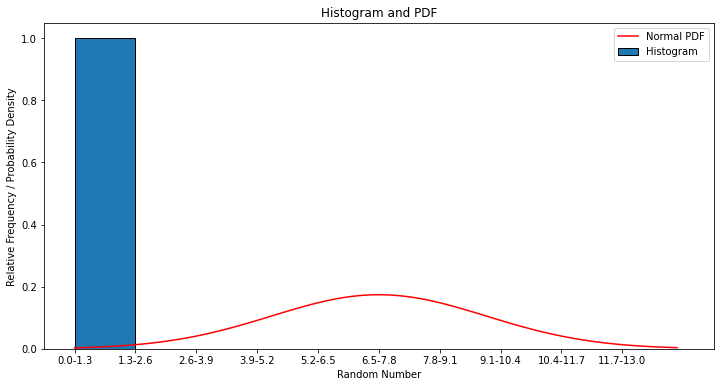

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 20 random numbers each:
Random numbers: [0.25645698533238614, 0.5872180476673393, 4.6345415093970725, 0.7386652639041449]
Max_Random is 4.6345415093970725
Min_Random is 0.25645698533238614

Mathematical Expectation (Theoretical): 6.5
Mathematical Expectation (Sample): 1.0

Theoretical Variance: 5.25
Unbiased Sample Variance: 0.0

Theoretical Standard Deviation: 2.29128784747792
Sample Standard Deviation: None

Relative Error for Mathematical Expectation: 84.61538461538461%
Relative Error for Standard Deviation: None%
Relative Error for Variance: None%



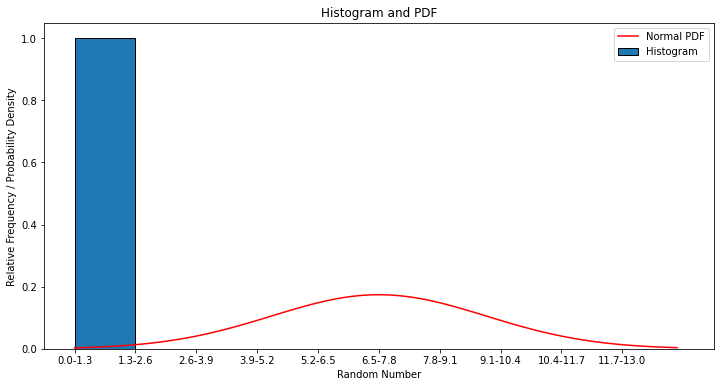

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 50 random numbers each:
Random numbers: [0.5587622868012057, 0.6934563027621606, 1.5654343206179888, 1.9796111720282383]
Max_Random is 1.9796111720282383
Min_Random is 0.5587622868012057

Mathematical Expectation (Theoretical): 6.5
Mathematical Expectation (Sample): 1.0

Theoretical Variance: 5.25
Unbiased Sample Variance: 0.0

Theoretical Standard Deviation: 2.29128784747792
Sample Standard Deviation: None

Relative Error for Mathematical Expectation: 84.61538461538461%
Relative Error for Standard Deviation: None%
Relative Error for Variance: None%



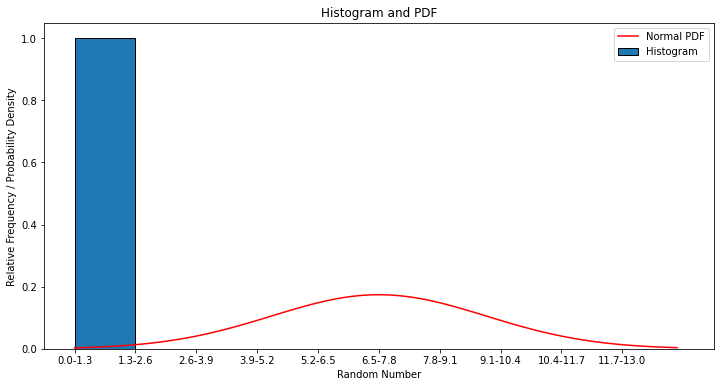

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 100 random numbers each:
Random numbers: [1.6727060862373198, 0.8389459415455109, 3.2775102666727154, 0.06549234041303209]
Max_Random is 3.2775102666727154
Min_Random is 0.06549234041303209

Mathematical Expectation (Theoretical): 6.5
Mathematical Expectation (Sample): 1.0

Theoretical Variance: 5.25
Unbiased Sample Variance: 0.0

Theoretical Standard Deviation: 2.29128784747792
Sample Standard Deviation: None

Relative Error for Mathematical Expectation: 84.61538461538461%
Relative Error for Standard Deviation: None%
Relative Error for Variance: None%



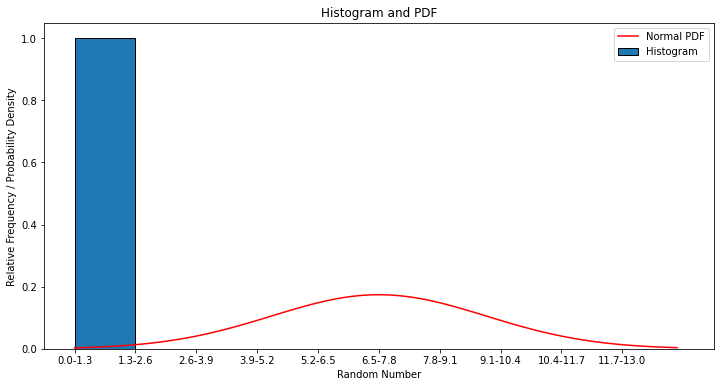

ValueError: math domain error

In [22]:
k1 = 2
k2 = 1
k3 = 7
k4 = 3

n_values= [10, 20, 50, 100, 200, 500, 10**3]

relative_err_mean_list = []
relative_err_std_list = []
relative_err_var_list = []


for n in n_values:
    random_frequencies = []

    for _ in range(n):
        # Generate random numbers 
        sum_random_frequencies, frequencies, random_numbers, sum_random_numbers = sum_of_random_frequencies_from_random_numbers(k1, k2, k3, k4)
        random_frequency = sum_random_frequencies
        random_frequencies.append(random_frequency)

        mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory_value, std_dev_sample, relative_err, relative_err_variance, relative_err_standard = simulations(k1, k2, k3, k4, random_frequencies)

    aggregate()

    left_boundary = 0  # Minimum boundary of the range
    right_boundary = 13  # Maximum boundary of the range
    num_plots = 10  # Number of intervals (bins)

    frequencies = relative_frequencies(random_frequencies, left_boundary, right_boundary, num_plots)

    draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, frequencies, std_dev_sample, mean_sample_value)
    #draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, frequencies, 1, 3)

    relative_err_mean_list.append(relative_err)
    relative_err_std_list.append(relative_err_standard)
    relative_err_var_list.append(relative_err_variance)
    

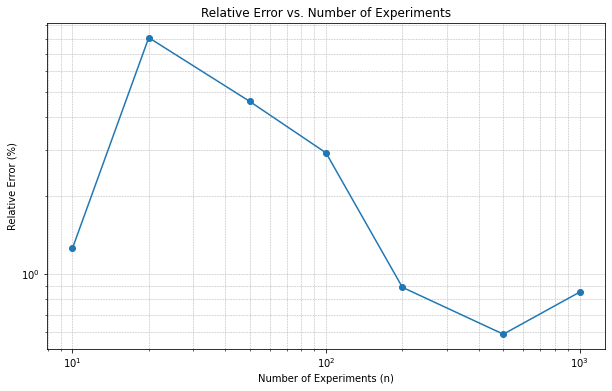

In [113]:
#RELATIVE ERROR FOR EXPECTATION
draw_graph_err(n_values, relative_err_mean_list) #drawing graph of relative error against n experiments.

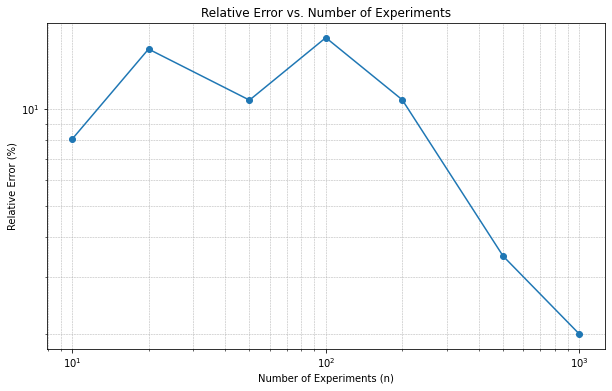

In [114]:
#RELATIVE ERROR FOR VARIANCE
draw_graph_err(n_values, relative_err_var_list)

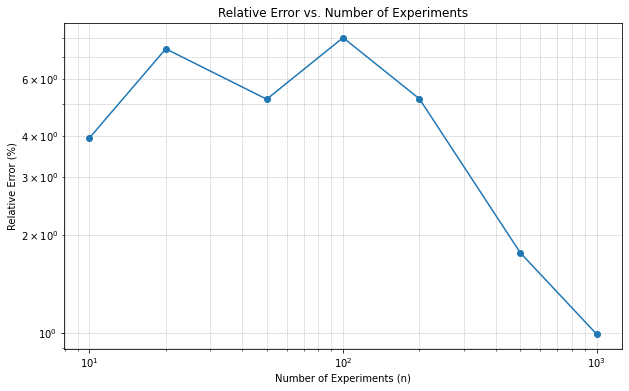

In [115]:
#RELATIVE ERROR FOR STANDARD DEVIATION
draw_graph_err(n_values, relative_err_std_list)

In [129]:
def trapezoidal_rule(x_values, y_values):
    area = 0
    for i in range(1, len(x_values)):
        # Trapezoidal approximation for each interval
        area += (x_values[i] - x_values[i - 1]) * (y_values[i] + y_values[i - 1]) / 2
    return area


x_values = [mean_theory_value - 3 * std_dev_theory_value + i * (6 * std_dev_theory_value) / 100 for i in range(100)]
y_values = [normal_dis_function(std_dev_theory_value, mean_theory_value, x) for x in x_values]

# Calculate the area under the curve
area = trapezoidal_rule(x_values, y_values)

# Display the area
print(f"Estimated area under the PDF curve: {area:.5f}")

Estimated area under the PDF curve: 0.99700
